In [62]:
import pandas as pd
import matplotlib.pyplot as plt


In [63]:
df=pd.read_csv('unique_cluster_kpi_timeseries.csv')

In [64]:
df.head()

,date,location,server,cluster,kpi
0,2024-01-01,Jaipur,INTEL,10000000000000,95.32
1,2024-01-02,Jaipur,INTEL,10000000000000,31.81
2,2024-01-03,Jaipur,INTEL,10000000000000,94.36
3,2024-01-04,Jaipur,INTEL,10000000000000,69.66
4,2024-01-05,Jaipur,INTEL,10000000000000,12.53


In [65]:
df.shape


(18000, 5)

In [66]:
print('shape:', df.shape)

shape: (18000, 5)


In [67]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18000 entries, 0 to 17999
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   date      18000 non-null  object 
 1   location  18000 non-null  object 
 2   server    18000 non-null  object 
 3   cluster   18000 non-null  int64  
 4   kpi       18000 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 703.3+ KB
None


In [68]:
df.isnull().sum()

date        0
location    0
server      0
cluster     0
kpi         0
dtype: int64

<Axes: >

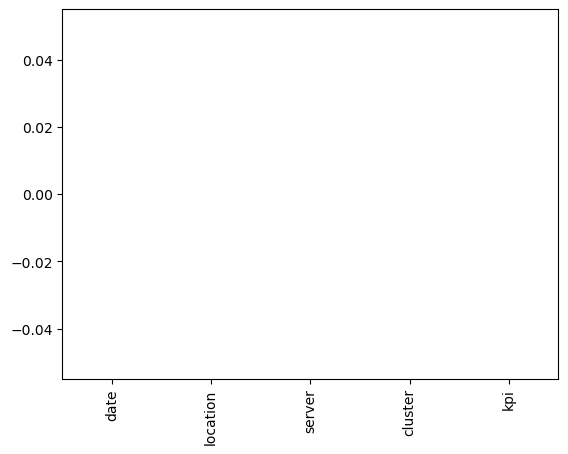

In [69]:
df.isnull().sum().plot(kind='bar', color='red')

In [70]:
df['date']=pd.to_datetime(df['date'])

In [71]:
df=df.sort_values('date')

In [72]:
df

,date,location,server,cluster,kpi
0,2024-01-01,Jaipur,INTEL,10000000000000,95.32
9330,2024-01-01,Mumbai,INTEL,10000000000311,20.26
690,2024-01-01,Jaipur,AMD,10000000000023,101.96
2100,2024-01-01,Jaipur,INTEL,10000000000070,12.22
9360,2024-01-01,Mumbai,INTEL,10000000000312,27.78
...,...,...,...,...,...
11549,2024-01-30,Bangalore,INTEL,10000000000384,16.88
11519,2024-01-30,Bangalore,INTEL,10000000000383,28.03
11489,2024-01-30,Bangalore,INTEL,10000000000382,32.71
10889,2024-01-30,Bangalore,INTEL,10000000000362,67.28


In [73]:
(df['group_id'] = df['location'].astype(str) + '_' + df['server'].astype(str) + '_' + df['cluster'].astype(str))

In [74]:
df

,date,location,server,cluster,kpi,group_id
0,2024-01-01,Jaipur,INTEL,10000000000000,95.32,Jaipur_INTEL_10000000000000
9330,2024-01-01,Mumbai,INTEL,10000000000311,20.26,Mumbai_INTEL_10000000000311
690,2024-01-01,Jaipur,AMD,10000000000023,101.96,Jaipur_AMD_10000000000023
2100,2024-01-01,Jaipur,INTEL,10000000000070,12.22,Jaipur_INTEL_10000000000070
9360,2024-01-01,Mumbai,INTEL,10000000000312,27.78,Mumbai_INTEL_10000000000312
...,...,...,...,...,...,...
11549,2024-01-30,Bangalore,INTEL,10000000000384,16.88,Bangalore_INTEL_10000000000384
11519,2024-01-30,Bangalore,INTEL,10000000000383,28.03,Bangalore_INTEL_10000000000383
11489,2024-01-30,Bangalore,INTEL,10000000000382,32.71,Bangalore_INTEL_10000000000382
10889,2024-01-30,Bangalore,INTEL,10000000000362,67.28,Bangalore_INTEL_10000000000362


In [75]:
for group in df['group_id'].unique():
    group_data = df[df['group_id'] == group]


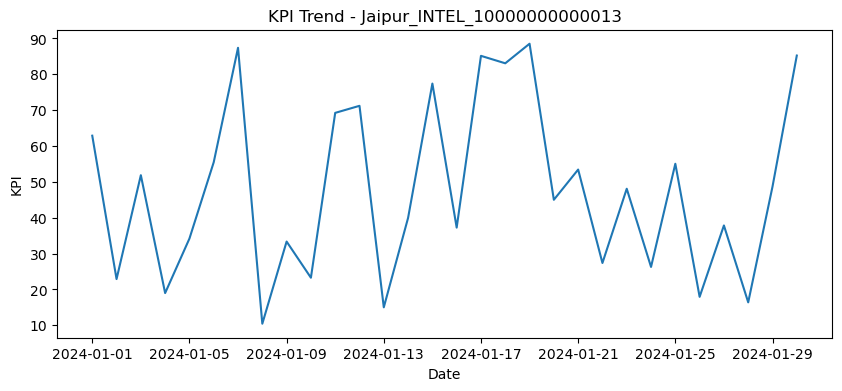

In [76]:
plt.figure(figsize=(10, 4))
plt.plot(group_data['date'], group_data['kpi'])
plt.title(f"KPI Trend - {group}")
plt.xlabel("Date")
plt.ylabel("KPI")
plt.show()

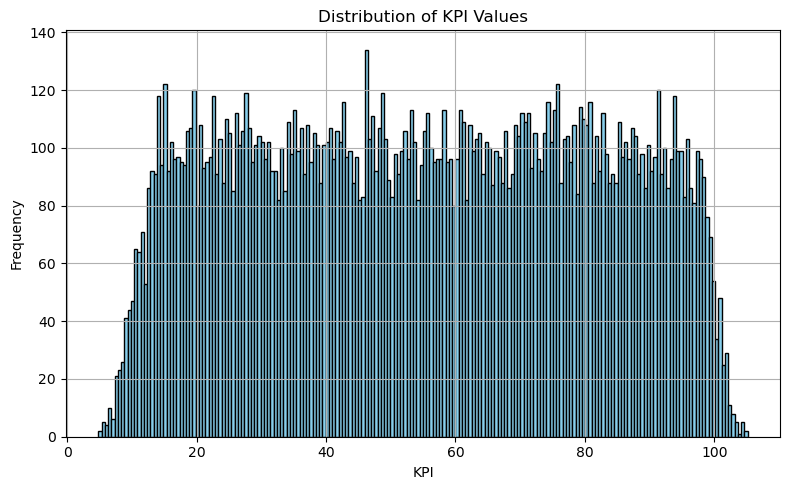

In [77]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.hist(df['kpi'], bins=200, color='skyblue', edgecolor='black')
plt.title("Distribution of KPI Values")
plt.xlabel("KPI")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()


In [78]:
from statsmodels.tsa.arima.model import ARIMA

Processing group: Jaipur_INTEL_10000000000000


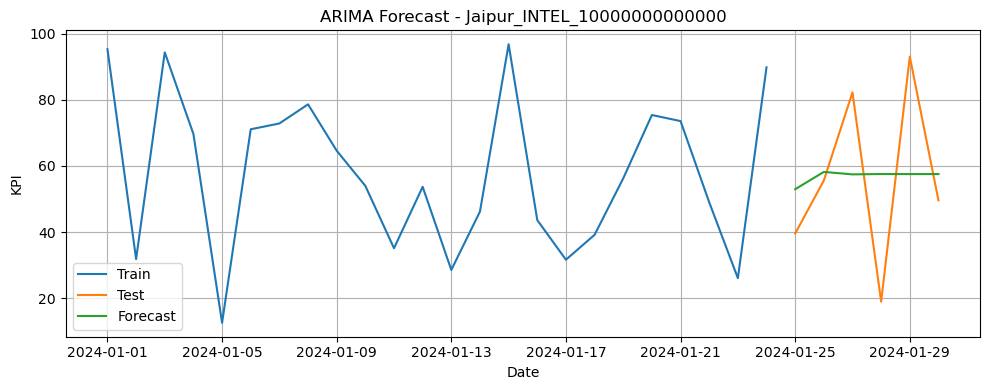

Processing group: Mumbai_INTEL_10000000000311


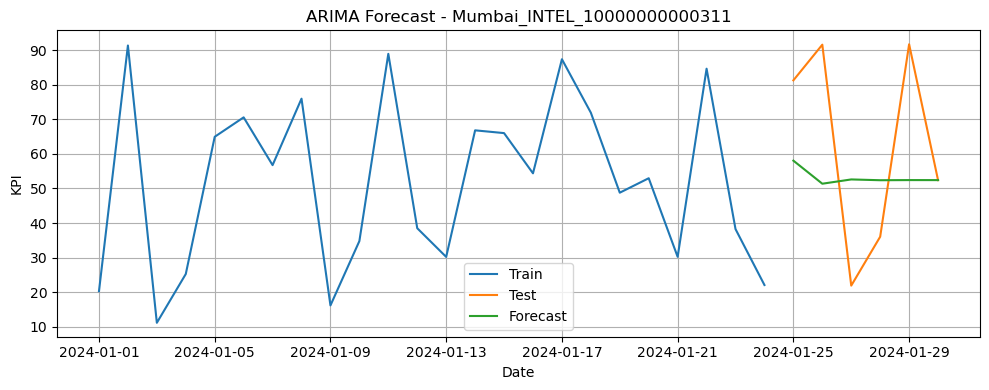

Processing group: Jaipur_AMD_10000000000023


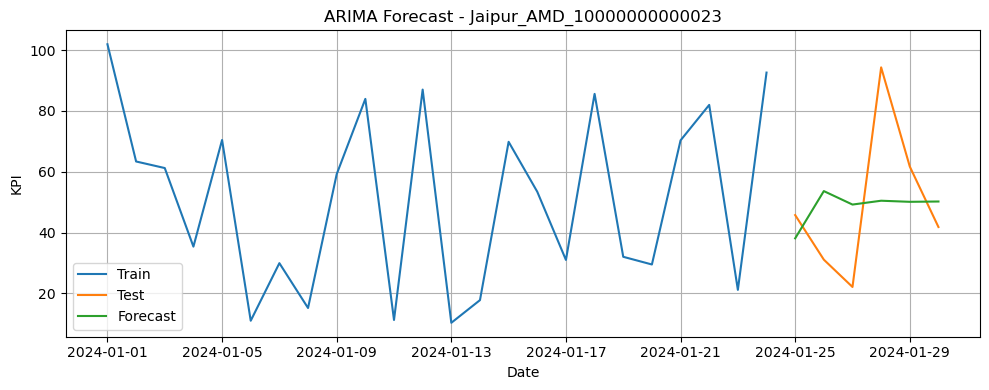

Processing group: Jaipur_INTEL_10000000000070


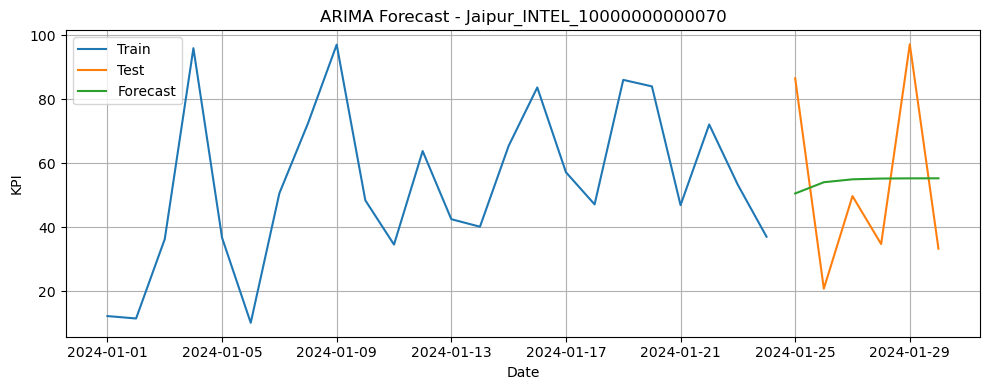

Processing group: Mumbai_INTEL_10000000000312


/Users/krishna/miniconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


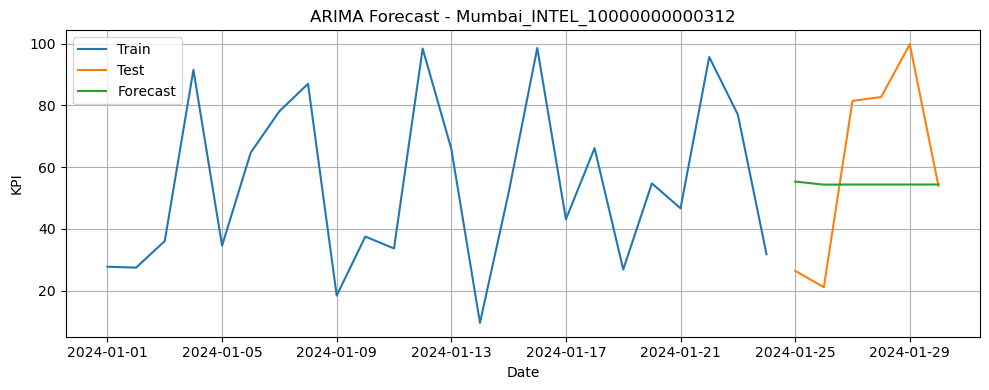

In [90]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

results = {}  # to store forecasts

# Ensure 'date' is in datetime format
df['date'] = pd.to_datetime(df['date'])

# Loop over only the first 5 unique groups

    try:
        # Step 1: Extract and prepare time series
        group_data = df[df['group_id'] == group].sort_values('date')
        ts = group_data.set_index('date')['kpi']
        ts.index = pd.DatetimeIndex(ts.index)
        ts.index.freq = 'D'  # Set daily frequency to avoid warnings

        # Skip if not enough data
        if len(ts) < 20:
            print(f"Skipped {group} (not enough data)")
            continue

        # Step 2: Train-test split
        train_size = int(len(ts) * 0.8)
        train, test = ts[:train_size], ts[train_size:]

        # Step 3: Fit ARIMA model
        model = ARIMA(train, order=(1, 1, 1))
        model_fit = model.fit()

        # Step 4: Forecast
        forecast = model_fit.forecast(steps=len(test))

        # Step 5: Plot
        plt.figure(figsize=(10, 4))
        plt.plot(train.index, train, label='Train')
        plt.plot(test.index, test, label='Test')
        plt.plot(test.index, forecast, label='Forecast')
        plt.title(f"ARIMA Forecast - {group}")
        plt.xlabel("Date")
        plt.ylabel("KPI")
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()

        # Step 6: Save results
        results[group] = {
            'model': model_fit,
            'forecast': forecast,
            'actual': test
        }

    except Exception as e:
        print(f"❌ Skipped {group} due to error: {e}")


In [91]:
from sklearn.metrics import mean_squared_error

for group, result in results.items():
    mse = mean_squared_error(result['actual'], result['forecast'])
    print(f"{group} MSE: {mse:.2f}")


Jaipur_INTEL_10000000000000 MSE: 603.16
Mumbai_INTEL_10000000000311 MSE: 820.53
Jaipur_AMD_10000000000023 MSE: 572.55
Jaipur_INTEL_10000000000070 MSE: 849.78
Mumbai_INTEL_10000000000312 MSE: 923.25


            date   location server         cluster    kpi
10800 2024-01-01  Bangalore    AMD  10000000000360  16.62
10801 2024-01-02  Bangalore    AMD  10000000000360  85.23
10802 2024-01-03  Bangalore    AMD  10000000000360  28.91
10803 2024-01-04  Bangalore    AMD  10000000000360  39.81
10804 2024-01-05  Bangalore    AMD  10000000000360  62.23

--- Random Forest Evaluation ---
Mean Absolute Error (MAE): 1.75
Root Mean Squared Error (RMSE): 2.31
R-squared (R²): 0.9924

--- Gradient Boosting Evaluation ---
Mean Absolute Error (MAE): 1.29
Root Mean Squared Error (RMSE): 1.66
R-squared (R²): 0.9961


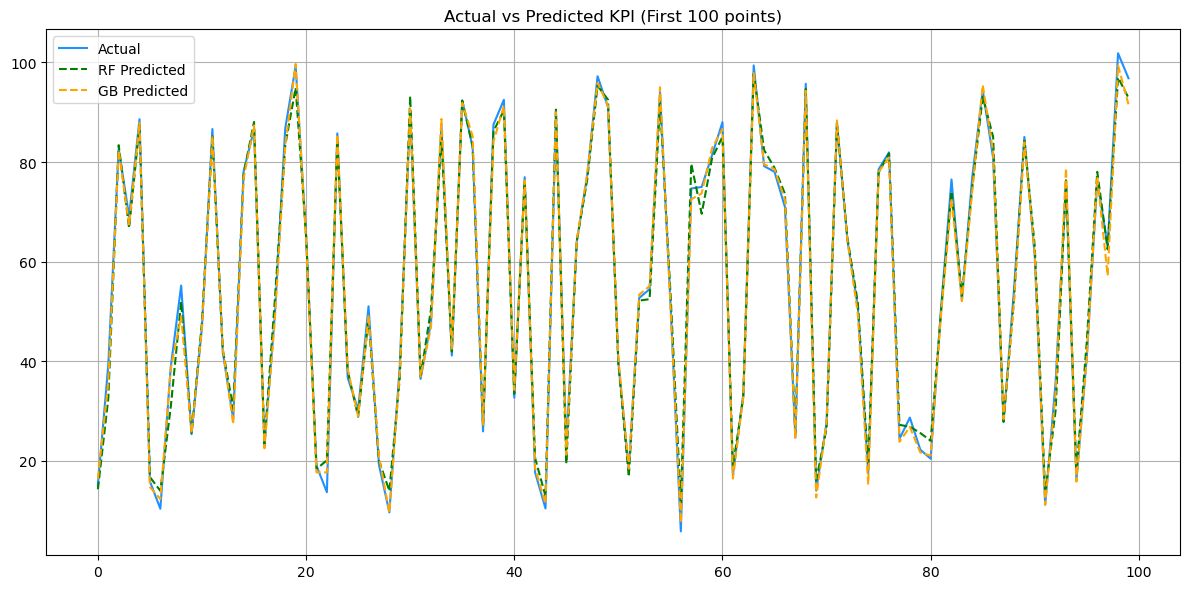

,date,location,server,cluster,kpi,dayofweek,weekofyear,kpi_lag1,kpi_lag2,kpi_lag3,kpi_rolling_mean_3,kpi_rolling_std_3
10803,2024-01-04,Bangalore,AMD,10000000000360,39.81,3,1,28.91,85.23,16.62,51.316667,29.871192
10804,2024-01-05,Bangalore,AMD,10000000000360,62.23,4,1,39.81,28.91,85.23,43.650000,16.988667
10805,2024-01-06,Bangalore,AMD,10000000000360,99.85,5,1,62.23,39.81,28.91,67.296667,30.338980
10806,2024-01-07,Bangalore,AMD,10000000000360,96.40,6,1,99.85,62.23,39.81,86.160000,20.795656
10807,2024-01-08,Bangalore,AMD,10000000000360,39.33,0,2,96.40,99.85,62.23,78.526667,33.989111


In [169]:
# ------------------- Imports -------------------
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# ------------------- Load & Prepare Data -------------------
df = pd.read_csv("unique_cluster_kpi_timeseries.csv", parse_dates=['date'])

# Get all columns except 'kpi'
df = pd.read_csv("unique_cluster_kpi_timeseries.csv", parse_dates=['date'])

# Sort in specified order
df = df.sort_values(by=['server', 'location', 'cluster', 'date'])

print(df.head())

# ------------------- Time Features -------------------
df['dayofweek'] = df['date'].dt.dayofweek
df['weekofyear'] = df['date'].dt.isocalendar().week

# ------------------- Lag & Rolling Features -------------------
df['kpi_lag1'] = df['kpi'].shift(1)
df['kpi_lag2'] = df['kpi'].shift(2)
df['kpi_lag3'] = df['kpi'].shift(3)
df['kpi_rolling_mean_3'] = df['kpi'].rolling(window=3).mean()
df['kpi_rolling_std_3'] = df['kpi'].rolling(window=3).std()
df.dropna(inplace=True)
df.head()

# ------------------- Final Features -------------------
features = ['kpi_lag1', 'kpi_lag2', 'kpi_lag3', 'kpi_rolling_mean_3', 'kpi_rolling_std_3', 'dayofweek', 'weekofyear']
target = 'kpi'
X = df[features]
y = df[target]

# ------------------- Scaling -------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ------------------- Time-Aware Train/Test Split -------------------
split_index = int(0.8 * len(df))
X_train, X_test = X_scaled[:split_index], X_scaled[split_index:]
y_train, y_test = y.iloc[:split_index], y.iloc[split_index:]

# ------------------- Model Training -------------------
rf_model = RandomForestRegressor(n_estimators=200, max_depth=10, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

gb_model = GradientBoostingRegressor(n_estimators=300, learning_rate=0.1, max_depth=5, random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)

# ------------------- Evaluation Function -------------------
def evaluate_model(y_true, y_pred, name):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"\n--- {name} Evaluation ---")
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
    print(f"R-squared (R²): {r2:.4f}")
    return mse, rmse, mae, r2

evaluate_model(y_test, y_pred_rf, "Random Forest")
evaluate_model(y_test, y_pred_gb, "Gradient Boosting")

# ------------------- Visualization -------------------
plt.figure(figsize=(12, 6))
plt.plot(y_test.values[:100], label="Actual", color='dodgerblue')
plt.plot(y_pred_rf[:100], label="RF Predicted", linestyle='--', color='green')
plt.plot(y_pred_gb[:100], label="GB Predicted", linestyle='--', color='orange')
plt.title("Actual vs Predicted KPI (First 100 points)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
df.head()


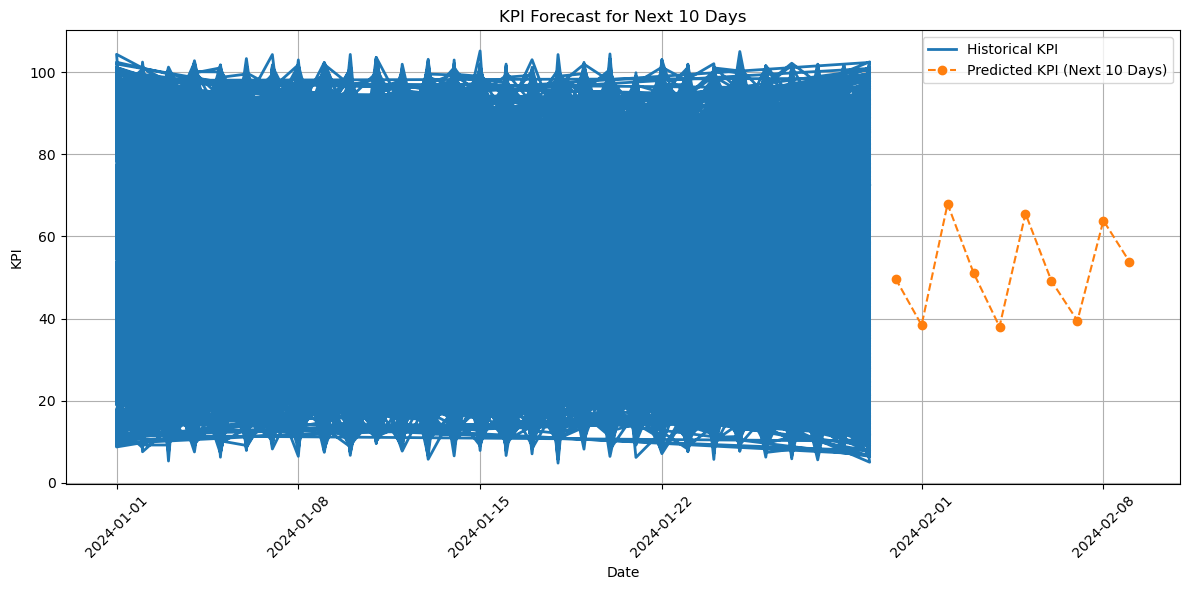

In [189]:


# Step 8: Predict next 10 days from the last known row
future_df = df.copy()
for i in range(10):
    last_row = future_df.iloc[-1]
    next_date = last_row['date'] + timedelta(days=1)

    new_row = {
        'date': next_date,
        'location': last_row['location'],
        'server': last_row['server'],
        'cluster': last_row['cluster'],
        'year': next_date.year,
        'month': next_date.month,
        'day': next_date.day,
        'dayofweek': next_date.dayofweek,
        'weekofyear': next_date.isocalendar()[1],
        'kpi_lag1': last_row['kpi'],
        'kpi_lag2': future_df.iloc[-2]['kpi'],
        'kpi_lag3': future_df.iloc[-3]['kpi'],
        'kpi_rolling_mean_3': future_df.iloc[-3:]['kpi'].mean(),
        'kpi_rolling_std_3': future_df.iloc[-3:]['kpi'].std()
    }

    new_row_df = pd.DataFrame([new_row])
    new_X = new_row_df[feature_cols]
    new_X_scaled = scaler.transform(new_X)

    pred_kpi = model.predict(new_X_scaled)[0]
    new_row['kpi'] = pred_kpi

    future_df = pd.concat([future_df, pd.DataFrame([new_row])], ignore_index=True)

# Step 9: Plot the result
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['kpi'], label='Historical KPI', linewidth=2)
plt.plot(future_df.tail(10)['date'], future_df.tail(10)['kpi'], label='Predicted KPI (Next 10 Days)', marker='o', linestyle='--')
plt.title('KPI Forecast for Next 10 Days')
plt.xlabel('Date')
plt.ylabel('KPI')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [187]:
future_df.tail(10)[['date', 'kpi']]


,date,kpi
17997,2024-01-31,49.705589
17998,2024-02-01,38.407354
17999,2024-02-02,67.901201
18000,2024-02-03,51.130695
18001,2024-02-04,38.033151
18002,2024-02-05,65.556950
18003,2024-02-06,49.143841
18004,2024-02-07,39.476653
18005,2024-02-08,63.860094
18006,2024-02-09,53.882186


In [192]:
df[('locatio')].max()


4

In [193]:
df.tail()

,date,location,server,cluster,kpi,year,month,day,dayofweek,weekofyear,kpi_lag1,kpi_lag2,kpi_lag3,kpi_rolling_mean_3,kpi_rolling_std_3
10795,2024-01-26,4,1,359,77.55,2024,1,26,4,4,15.66,16.14,39.62,36.450000,35.594453
10796,2024-01-27,4,1,359,62.99,2024,1,27,5,4,77.55,15.66,16.14,52.066667,32.358653
10797,2024-01-28,4,1,359,48.01,2024,1,28,6,4,62.99,77.55,15.66,62.850000,14.770498
10798,2024-01-29,4,1,359,38.46,2024,1,29,0,5,48.01,62.99,77.55,49.820000,12.364760
10799,2024-01-30,4,1,359,72.35,2024,1,30,1,5,38.46,48.01,62.99,52.940000,17.474602


In [212]:
from datetime import timedelta

# Step 1: Filter the data for the node you want to forecast
node_df = df[(df['server'] == 'INTEL') &
             (df['location'] == '1') &
             (df['cluster'] == '10000000000599')].copy()

# Check if there's enough data to predict
if len(node_df) < 3:
    print("❌ Not enough historical data (at least 3 rows needed) for forecasting.")
else:
    # Step 2: Sort and select required features
    node_df = node_df.sort_values('date')
    node_df = node_df[['date', 'kpi'] + features].copy()

    # Step 3: Predict next 10 days
    future_predictions = []

    for i in range(10):
        last_row = node_df.iloc[-1]
        next_date = last_row['date'] + timedelta(days=1)

        # Build feature dict
        kpi_lag1 = last_row['kpi']
        kpi_lag2 = node_df.iloc[-2]['kpi']
        kpi_lag3 = node_df.iloc[-3]['kpi']
        rolling_vals = node_df.iloc[-3:]['kpi']

        feature_dict = {
            'kpi_lag1': kpi_lag1,
            'kpi_lag2': kpi_lag2,
            'kpi_lag3': kpi_lag3,
            'kpi_rolling_mean_3': rolling_vals.mean(),
            'kpi_rolling_std_3': rolling_vals.std(),
            'dayofweek': next_date.dayofweek,
            'weekofyear': next_date.isocalendar()[1]
        }

        # Convert to DataFrame and scale
        feature_df = pd.DataFrame([feature_dict])
        feature_scaled = scaler.transform(feature_df)

        # Predict
        pred_kpi = rf_model.predict(feature_scaled)[0]

        # Append prediction
        new_row = {
            'date': next_date,
            'kpi': pred_kpi,
            **feature_dict
        }
        node_df = pd.concat([node_df, pd.DataFrame([new_row])], ignore_index=True)
        future_predictions.append(new_row)

    # Step 4: Plot
    future_df = pd.DataFrame(future_predictions)

    plt.figure(figsize=(12, 6))
    plt.plot(node_df['date'], node_df['kpi'], label='Historical + Predicted KPI', color='dodgerblue')
    plt.plot(future_df['date'], future_df['kpi'], label='Next 10 Days Forecast', marker='o', linestyle='--', color='orange')
    plt.title('KPI Forecast for Node: INTEL / Hyderabad / 10000000000599')
    plt.xlabel('Date')
    plt.ylabel('KPI')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


❌ Not enough historical data (at least 3 rows needed) for forecasting.


In [211]:
df.groupby(['server', 'location', 'cluster']).size().reset_index(name='count').sort_values(by='count', ascending=False)


,server,location,cluster,count
300,0,4,344,30
394,1,1,167,30
396,1,1,169,30
397,1,1,170,30
398,1,1,173,30
...,...,...,...,...
200,0,3,60,30
201,0,3,61,30
202,0,3,65,30
203,0,3,66,30
